In [104]:
 %matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.diagnostic import normal_ad
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix

In [74]:
data1 = pd.read_csv('fifa_cleaned.csv')

In [75]:
df = pd.DataFrame(data1)

In [76]:
pd.set_option('display.max_columns', None)

In [77]:
df

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),work_rate,body_type,release_clause_euro,club_team,club_rating,club_position,club_jersey_number,club_join_date,contract_end_year,national_team,national_rating,national_team_position,national_jersey_number,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,5,4,4,Medium/ Low,Messi,226500000.0,FC Barcelona,86.0,RW,10.0,2004-07-01,2021,Argentina,82.0,RF,10.0,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,190460,C. Eriksen,Christian Dannemann Eriksen,1992-02-14,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,3,5,4,High/ Medium,Lean,133800000.0,Tottenham Hotspur,83.0,LCM,23.0,2013-08-30,2020,Denmark,78.0,CAM,10.0,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ...",79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,195864,P. Pogba,Paul Pogba,1993-03-15,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,4,4,5,High/ Medium,Normal,144200000.0,Manchester United,82.0,LCM,6.0,2016-08-09,2021,France,84.0,RDM,6.0,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take...",81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,198219,L. Insigne,Lorenzo Insigne,1991-06-04,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,3,4,4,High/ Medium,Normal,105400000.0,Napoli,82.0,LS,24.0,2010-07-01,2022,Italy,83.0,LW,10.0,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,"#Speedster,#Dribbler,#Crosser,#Acrobat","Finesse Shot,Long Shot Taker (CPU AI Only),Spe...",78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,201024,K. Koulibaly,Kalidou Koulibaly,1991-06-20,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,3,3,2,High/ High,Normal,106500000.0,Napoli,82.0,LCB,26.0,2014-07-01,2021,NaN,NaN,NaN,NaN,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,"#Tackling ,#Tactician ,#Strength,#Complete Def...",Power Header,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,204322,R. McKenzie,Rory McKenzie,1993-10-07,25,175.26,74.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 92 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In [79]:
df.isnull().sum()


id               0
name             0
full_name        0
birth_date       0
age              0
              ... 
LB            2065
LCB           2065
CB            2065
RCB           2065
RB            2065
Length: 92, dtype: int64

<AxesSubplot:ylabel='Frequency'>

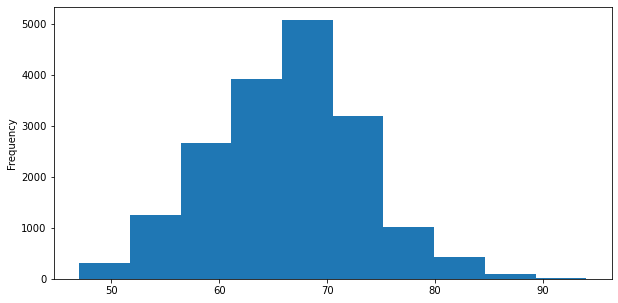

In [80]:
plt.figure(figsize=(10,5))
df['overall_rating'].plot(kind='hist')


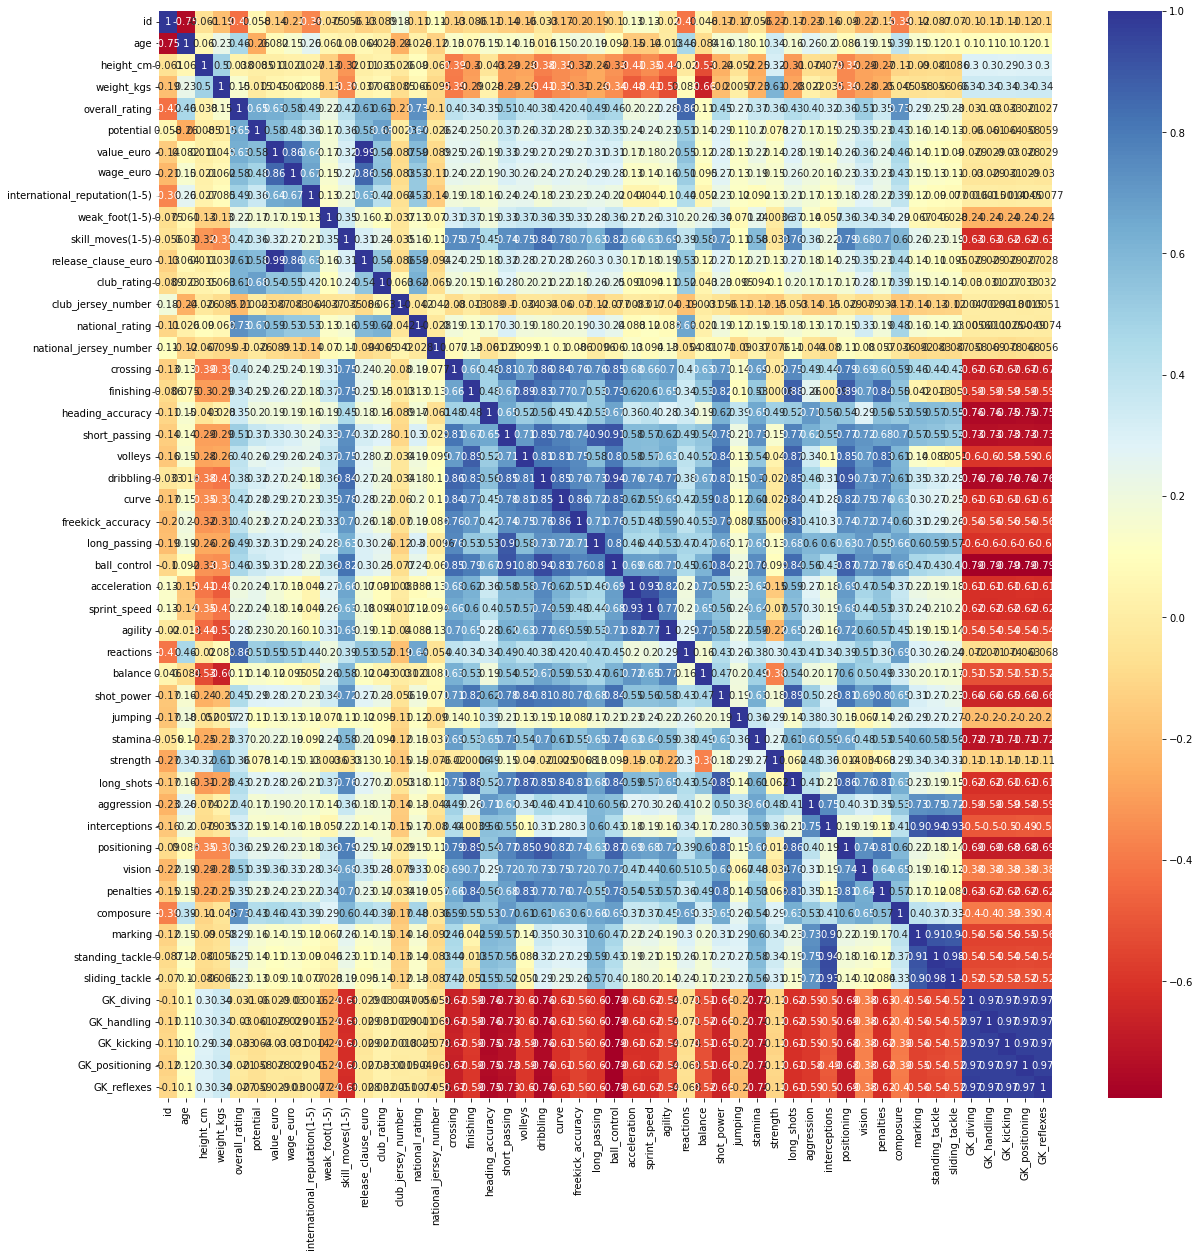

In [81]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot = True , cmap= plt.cm.RdYlBu)
plt.show()

In [82]:
df = df.drop(['id','name','full_name','height_cm','weight_kgs','positions','nationality',
 'value_euro','wage_euro','preferred_foot','international_reputation(1-5)','weak_foot(1-5)',
 'skill_moves(1-5)', 'work_rate','body_type','release_clause_euro','club_team','club_rating',
 'club_position','club_jersey_number','club_join_date','contract_end_year','national_team','national_rating',
'national_team_position','national_jersey_number','tags','traits','birth_date'],axis=1)

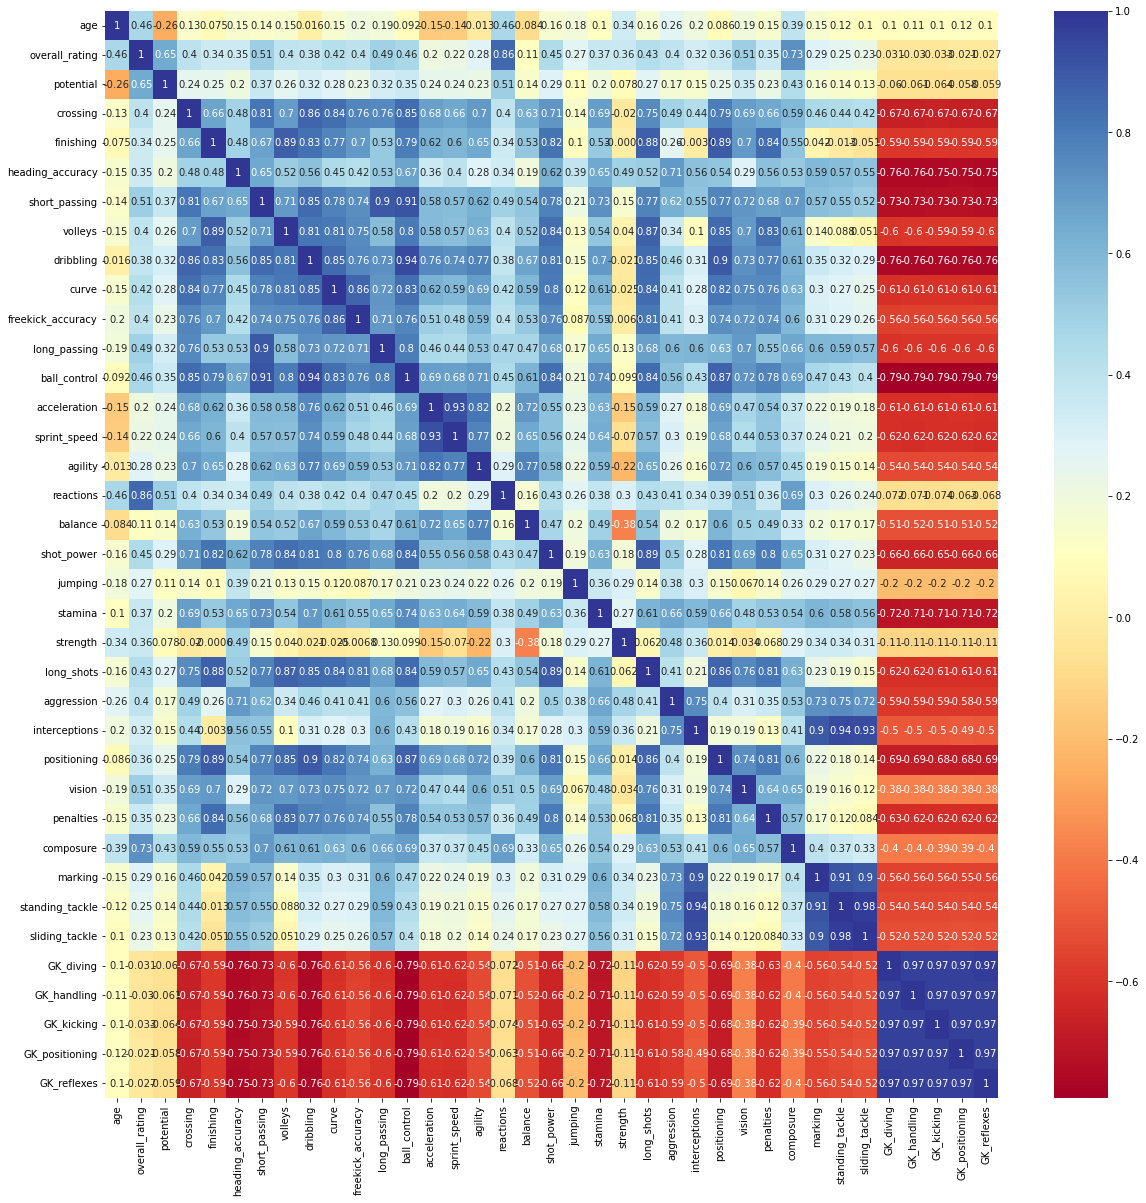

In [83]:
plt.figure(figsize=(20,20))
corr = df.corr()
sns.heatmap(corr, annot = True , cmap= plt.cm.RdYlBu)
plt.show()

In [84]:
target_corr = abs(corr["overall_rating"])
positive_corr_target = target_corr[target_corr>0.5]
positive_corr_target

overall_rating    1.000000
potential         0.647249
short_passing     0.506819
reactions         0.855767
vision            0.506812
composure         0.729278
Name: overall_rating, dtype: float64

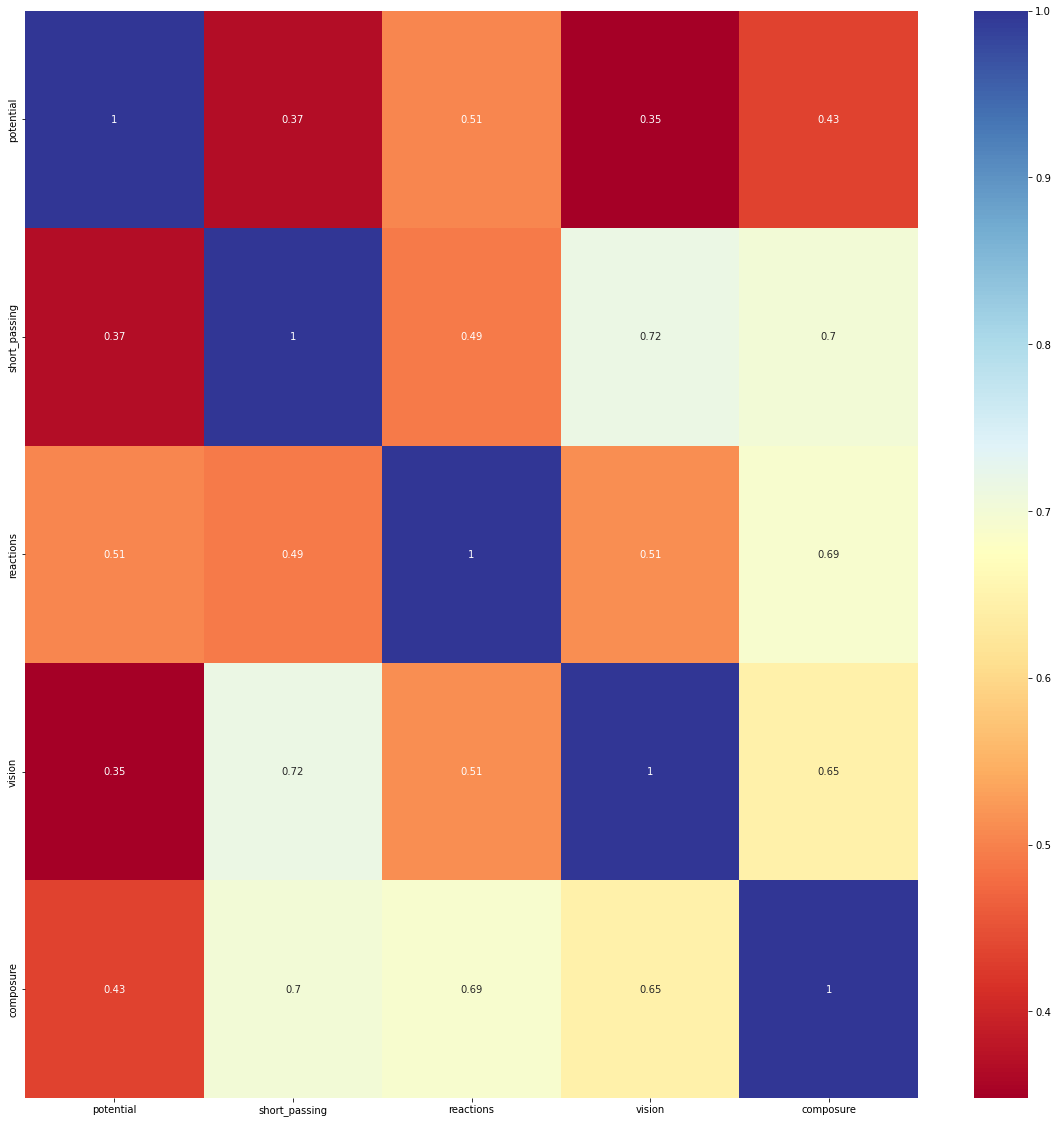

In [85]:
plt.figure(figsize=(20,20))
newcorr = df[['potential','short_passing','reactions','vision','composure']].corr()
sns.heatmap(newcorr, annot = True , cmap= plt.cm.RdYlBu)
plt.show()


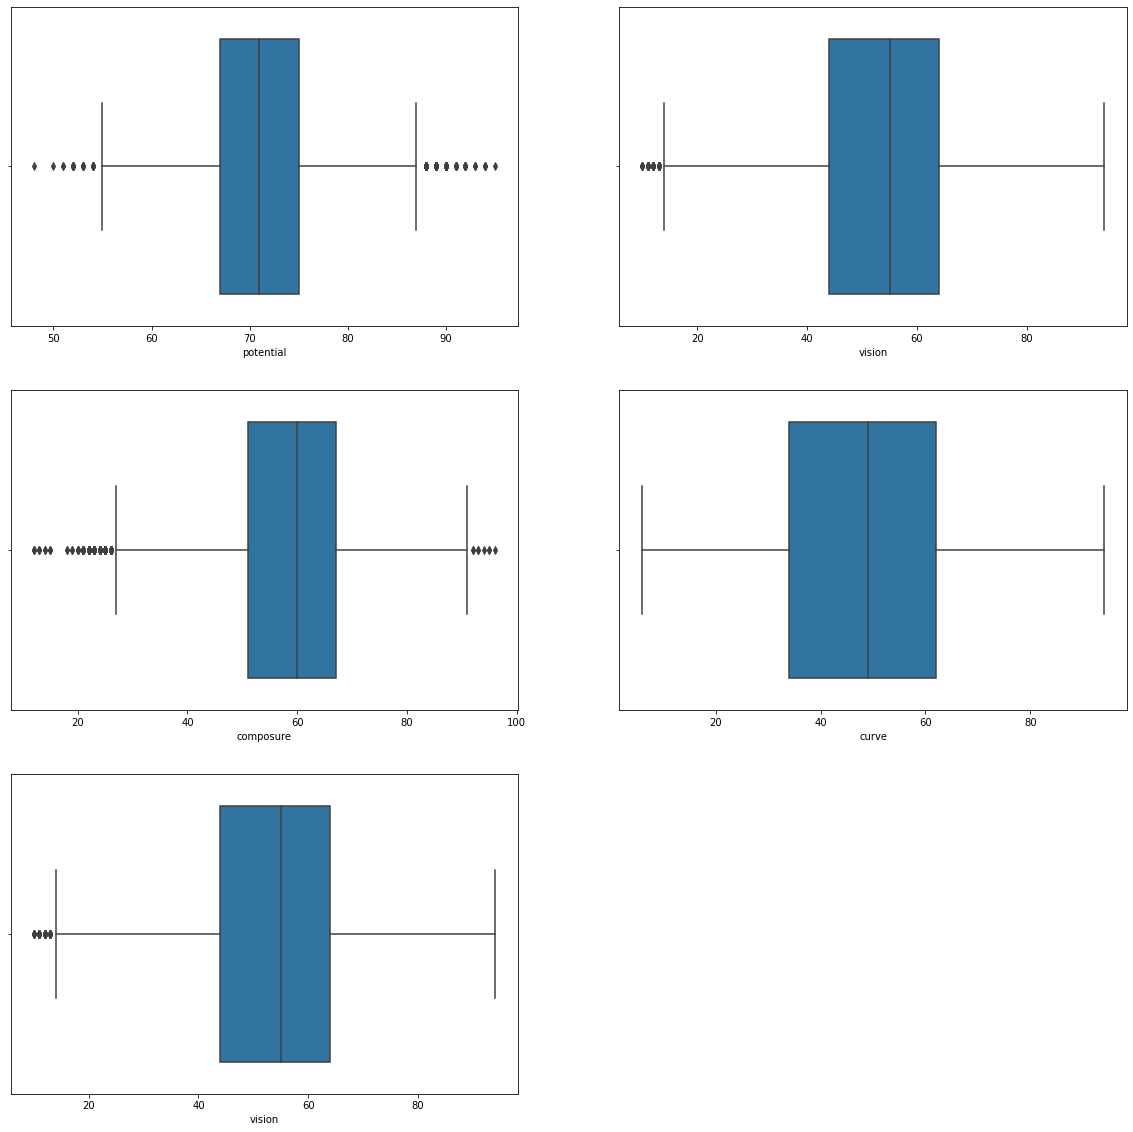

In [86]:
plt.rcParams["figure.figsize"] = (20,20)
plt.subplot(3,2,1);
sns.boxplot(x = df['potential']);
plt.subplot(3,2,2);
sns.boxplot(x = df['vision']);
plt.subplot(3,2,3);
sns.boxplot(x = df['composure']);
plt.subplot(3,2,4);
sns.boxplot(x = df['curve']);
plt.subplot(3,2,5);
sns.boxplot(x = df['vision']);

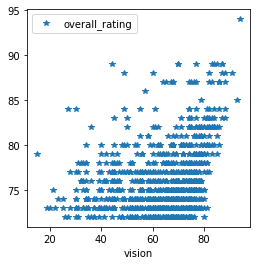

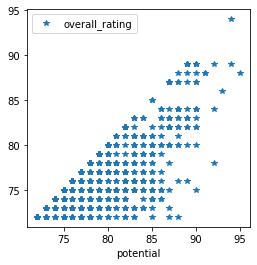

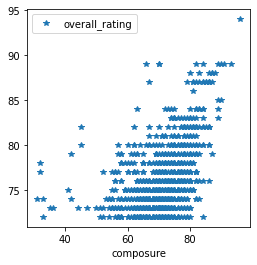

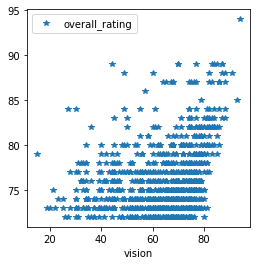

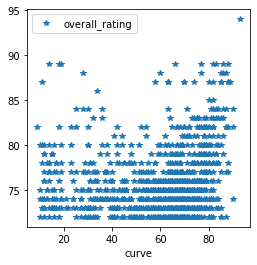

In [87]:
graph_df = df.head(1000)
plt.rcParams["figure.figsize"] = (4,4)
graph_df.plot(x='vision', y='overall_rating', style='*')
plt.show()
graph_df.plot(x='potential', y='overall_rating', style='*')
plt.show()
graph_df.plot(x='composure', y='overall_rating', style='*')
plt.show()
graph_df.plot(x='vision', y='overall_rating', style='*')
plt.show()
graph_df.plot(x='curve', y='overall_rating', style='*')
plt.show()


In [88]:
df

,age,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,31,94,94,86,95,70,92,86,97,93,94,89,96,91,86,93,95,95,85,68,72,66,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,91+2,85+2,85+2,85+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,48+2,48+2,48+2,59+2
1,27,88,89,88,81,52,91,80,84,86,87,89,91,76,73,80,88,81,84,50,92,58,89,46,56,84,91,67,88,59,57,22,9,14,7,7,6,79+3,79+3,79+3,85+3,84+3,84+3,84+3,85+3,86+3,86+3,86+3,86+3,85+3,85+3,85+3,86+3,71+3,71+3,71+3,71+3,71+3,66+3,57+3,57+3,57+3,66+3
2,25,88,91,80,75,75,86,85,87,85,82,90,90,71,79,76,82,66,90,83,88,87,82,78,64,82,88,82,87,63,67,67,5,6,2,4,3,81+3,81+3,81+3,82+3,83+3,83+3,83+3,82+3,84+3,84+3,84+3,83+3,84+3,84+3,84+3,83+3,76+3,77+3,77+3,77+3,76+3,74+3,72+3,72+3,72+3,74+3
3,27,88,88,86,77,56,85,74,90,87,77,78,93,94,86,94,83,93,75,53,75,44,84,34,26,83,87,61,83,51,24,22,8,4,14,9,10,78+3,78+3,78+3,86+3,85+3,85+3,85+3,86+3,86+3,86+3,86+3,86+3,78+3,78+3,78+3,86+3,63+3,58+3,58+3,58+3,63+3,58+3,44+3,44+3,44+3,58+3
4,27,88,91,30,22,83,68,14,69,28,28,60,63,70,75,50,82,40,55,81,75,94,15,87,88,24,49,33,80,91,88,87,7,11,7,13,5,53+3,53+3,53+3,53+3,54+3,54+3,54+3,53+3,55+3,55+3,55+3,57+3,61+3,61+3,61+3,57+3,73+3,77+3,77+3,77+3,73+3,76+3,85+3,85+3,85+3,76+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,67,70,57,61,60,66,37,64,53,47,61,66,83,86,93,63,82,51,77,75,64,54,69,41,60,64,63,56,40,20,18,15,11,15,12,7,62+2,62+2,62+2,66+2,64+2,64+2,64+2,66+2,65+2,65+2,65+2,66+2,60+2,60+2,60+2,66+2,53+2,52+2,52+2,52+2,53+2,50+2,46+2,46+2,46+2,50+2
17950,23,59,67,50,19,53,55,31,52,26,28,43,53,70,64,54,50,53,27,74,66,70,22,62,55,42,39,32,52,53,64,60,15,7,7,15,8,43+2,43+2,43+2,47+2,45+2,45+2,45+2,47+2,46+2,46+2,46+2,50+2,48+2,48+2,48+2,50+2,57+2,55+2,55+2,55+2,57+2,57+2,58+2,58+2,58+2,57+2
17951,22,59,67,11,9,13,26,9,12,13,12,24,18,27,22,29,48,38,17,43,25,63,9,27,10,5,25,16,47,9,12,13,63,57,50,58,63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17952,21,59,71,42,60,55,49,49,57,47,39,37,56,84,86,65,53,73,56,58,58,49,58,38,15,54,52,50,53,16,18,17,15,14,12,6,9,58+2,58+2,58+2,58+2,58+2,58+2,58+2,58+2,55+2,55+2,55+2,56+2,47+2,47+2,47+2,56+2,41+2,35+2,35+2,35+2,41+2,39+2,32+2,32+2,32+2,39+2


In [89]:
df = df.drop(['age','crossing','finishing','heading_accuracy','short_passing',
              'volleys','dribbling','GK_diving','freekick_accuracy','long_passing',
              'ball_control','acceleration','sprint_speed','agility','GK_handling',
              'balance','shot_power','jumping','stamina','strength','long_shots',
              'aggression','interceptions', 'positioning','penalties','marking','standing_tackle',
              'sliding_tackle','LS','ST','RS','LW','CF','RF','RW','LAM','CAM','RAM','LM',
              'LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB','GK_kicking','GK_positioning','GK_reflexes','LF'],axis=1)

In [90]:
df

,overall_rating,potential,curve,reactions,vision,composure
0,94,94,93,95,94,96
1,88,89,86,88,91,88
2,88,91,85,82,88,87
3,88,88,87,83,87,83
4,88,91,28,82,49,80
...,...,...,...,...,...,...
17949,67,70,53,63,64,56
17950,59,67,26,50,39,52
17951,59,67,13,48,25,47
17952,59,71,47,53,52,53


In [91]:
x = df.drop(['overall_rating'],axis=1).values.reshape(-1,1)
y = df['overall_rating']

In [92]:
df = df.drop(['overall_rating'], axis = 1)

In [93]:
df

,potential,curve,reactions,vision,composure
0,94,93,95,94,96
1,89,86,88,91,88
2,91,85,82,88,87
3,88,87,83,87,83
4,91,28,82,49,80
...,...,...,...,...,...
17949,70,53,63,64,56
17950,67,26,50,39,52
17951,67,13,48,25,47
17952,71,47,53,52,53


In [94]:
df.isnull()

,potential,curve,reactions,vision,composure
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
17949,False,False,False,False,False
17950,False,False,False,False,False
17951,False,False,False,False,False
17952,False,False,False,False,False


In [95]:
x, y 

(array([[94],
        [93],
        [95],
        ...,
        [54],
        [49],
        [45]], dtype=int64),
 0        94
 1        88
 2        88
 3        88
 4        88
          ..
 17949    67
 17950    59
 17951    59
 17952    59
 17953    59
 Name: overall_rating, Length: 17954, dtype: int64)

In [96]:
x_train,x_test,y_train, y_test = train_test_split(df ,y, test_size=0.3)
x_train.shape,x_test.shape,y_train.shape, y_test.shape


((12567, 5), (5387, 5), (12567,), (5387,))

In [97]:
lrm = linear_model.LinearRegression()
lrm_model = lrm.fit(x_train, y_train)
lrm_predictions = lrm.predict(x_test)


In [98]:
lrm_predictions

array([57.5395479 , 62.83232283, 63.68992857, ..., 68.82511072,
       61.32634494, 70.67344726])

In [99]:
lrm_model.score(x_test,y_test)

0.8242345671832763

In [100]:
df2= pd.DataFrame(x_test)
df2['Actual_Ratings'] = y_test
df2["Predicted_Ratings"] = lrm_predictions
df2


,potential,curve,reactions,vision,composure,Actual_Ratings,Predicted_Ratings
5203,60,37,54,41,45,52,57.539548
7667,66,43,61,62,49,61,62.832323
10152,67,29,59,58,57,65,63.689929
11655,77,24,52,26,57,67,63.781074
11370,66,34,58,35,54,66,62.502564
...,...,...,...,...,...,...,...
1802,76,55,61,62,70,68,68.795967
11147,66,53,59,61,63,66,63.922327
1624,77,62,65,47,57,69,68.825111
6044,57,9,64,35,44,57,61.326345


In [102]:
print ("Enter the potential , vision , curve , reaction and composure rating of a player to get Overall Rating: ")
potential = input('Potential : ')
curve = input('curve: ')
reactions = input('reactions: ')
vision = input("vision : ")
composure = input('composure : ')
new_player = np.array([[potential,curve,reactions,vision,composure]])
pred_rating = lrm.predict(new_player)
print ('Rating of the new player will be :', pred_rating[0])

Enter the potential , vision , curve , reaction and composure rating of a player to get Overall Rating: 
Potential : 80
curve: 80
reactions: 20
vision : 40
composure : 50
Rating of the new player will be : 48.690616563431874


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)


In [108]:
df2 = df2.head(10)

In [109]:
from sklearn.metrics import r2_score
R_square = r2_score(y_test,lrm_predictions)
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.8242345671832763


In [110]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,lrm_predictions)


8.586645776977512

In [111]:
lrm_predictions

array([57.5395479 , 62.83232283, 63.68992857, ..., 68.82511072,
       61.32634494, 70.67344726])

In [112]:
final_pred = df2['Predicted_Ratings'].apply(np.ceil).astype(int)


In [113]:
y_test


5203     52
7667     61
10152    65
11655    67
11370    66
         ..
1802     68
11147    66
1624     69
6044     57
13230    69
Name: overall_rating, Length: 5387, dtype: int64

In [114]:
df2["Predicted_Ratings"] = final_pred

C:\Users\Asus\AppData\Local\Temp\ipykernel_21980\744129329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["Predicted_Ratings"] = final_pred


In [115]:
df2

,potential,curve,reactions,vision,composure,Actual_Ratings,Predicted_Ratings
5203,60,37,54,41,45,52,58
7667,66,43,61,62,49,61,63
10152,67,29,59,58,57,65,64
11655,77,24,52,26,57,67,64
11370,66,34,58,35,54,66,63
8247,65,45,60,61,56,62,64
3737,61,26,48,47,69,61,59
412,76,65,70,69,68,76,73
16548,75,70,68,65,70,75,72
16128,74,66,69,77,76,74,73


In [116]:
x_train,x_test,y_train, y_test = train_test_split(df ,y, test_size=0.3)
x_train.shape,x_test.shape,y_train.shape, y_test.shape

((12567, 5), (5387, 5), (12567,), (5387,))

In [117]:
from sklearn.tree import DecisionTreeRegressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

In [118]:
DTree.fit(x_train,y_train)
D_predict=DTree.predict(x_test)

In [119]:
from sklearn.metrics import r2_score
r2_score(y_test,D_predict)

0.7599750441592774

In [120]:
from sklearn.metrics import r2_score
R_square = r2_score(y_test,D_predict)
print('Coefficient of Determination', R_square)


Coefficient of Determination 0.7599750441592774


In [144]:
from sklearn.ensemble import RandomForestRegressor
RForest=RandomForestRegressor(n_estimators=5,random_state=329,min_samples_leaf=.0005)

In [145]:
RForest.fit(x_train,y_train)
f_predict=RForest.predict(x_test)

In [146]:
from sklearn.metrics import r2_score
r2_score(y_test,f_predict)

0.8600509195389635

In [147]:
from sklearn.metrics import r2_score
R_square = r2_score(y_test,f_predict)
print('Coefficient of Determination', R_square)


Coefficient of Determination 0.8600509195389635


In [149]:
print ("Enter the potential , vision , curve , reaction and composure rating of a player: ")
potential = input('Potential : ')
curve = input('curve: ')
reactions = input('reactions: ')
vision = input("vision : ")
composure = input('composure : ')
new_player = np.array([[potential,curve,reactions,vision,composure]])
linear = lrm.predict(new_player)
decision = DTree.predict(new_player)
forest = RForest.predict(new_player)
print ('Rating of the new player will be (linear):', linear[0])
print ('Rating of the new player will be (decision):', decision[0])
print ('Rating of the new player will be (random forest):', forest[0])

Enter the potential , vision , curve , reaction and composure rating of a player: 
Potential : 80
curve: 50
reactions: 60
vision : 80
composure : 90
Rating of the new player will be (linear): 72.58515334119988
Rating of the new player will be (decision): 72.5
Rating of the new player will be (random forest): 71.56025549613784


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:566: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
